# Animation of diffraction pattern propagation from a rectangular aperture

### by Kevin Javier Zvonarek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 
%matplotlib notebook

### Evolution of Prop. Pattern in X-dir

<IPython.core.display.Javascript object>


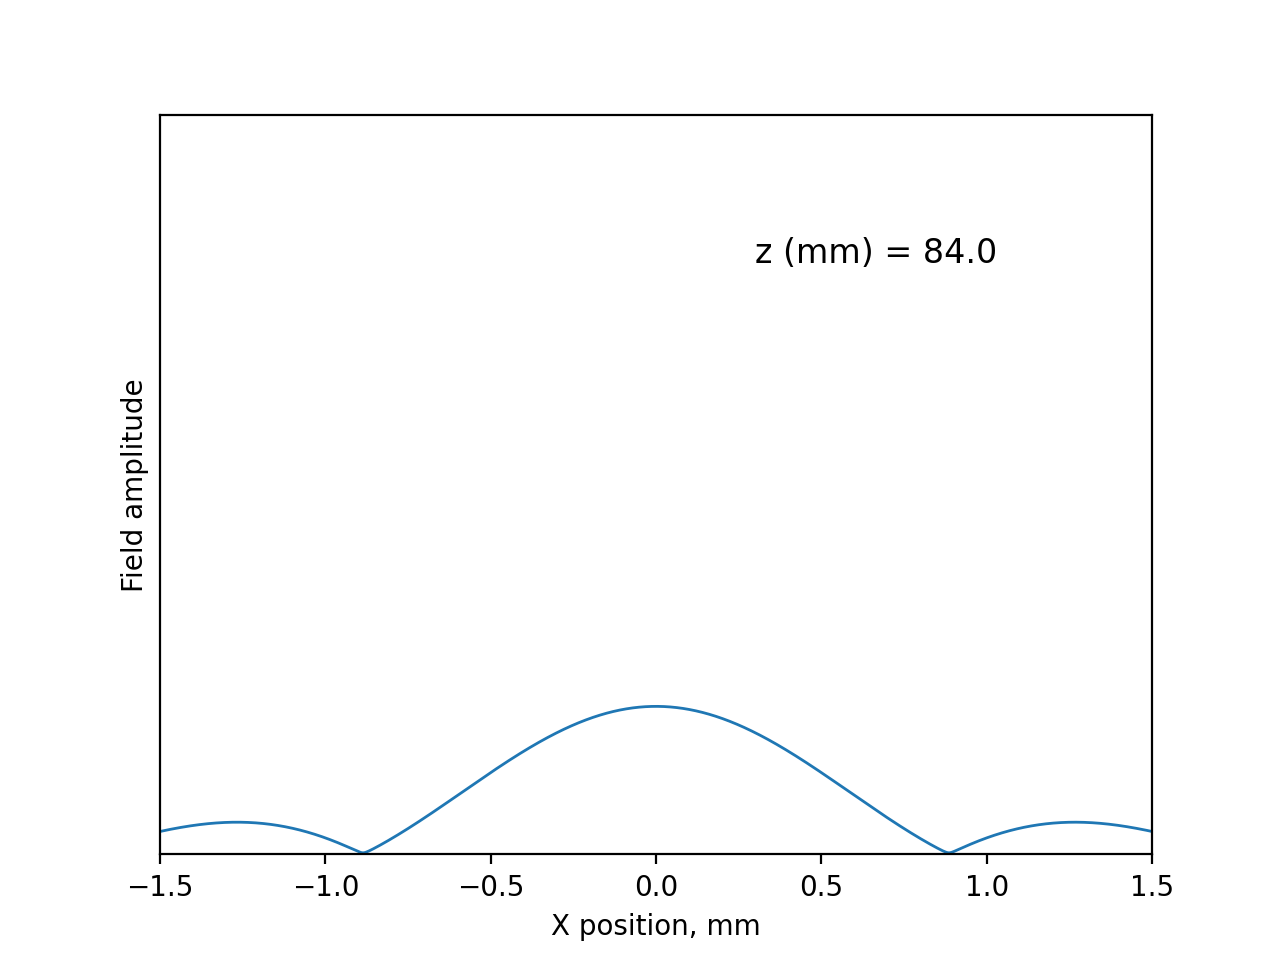

MovieWriter imagemagick unavailable; using Pillow instead.


In [5]:
x = np.linspace(-1000, 1000, num = int(2e6)) # Defining custom box-function 
field = np.zeros(x.size) 
field[np.logical_and(x > -0.03, x <= 0.03)] = 3.848 
dx = x[1] - x[0] # Spatial sampling period, units are mm
fS = 1 / dx      # Spatial sampling frequency, units are inverse mm
f  = fftshift(fftfreq(field.size)*fS*2*np.pi) # K array, units are inverse mm
Ek = fftshift(fft(field))*dx # FT from position into freq. space
z = 50 # Propagation distance in z-direction (mm)
c = 3e11 
wavelength = 6.328e-4 # 632.8 nm to mm
WC2 = ((2*np.pi*(c/wavelength))/(c))**2
Ky2 = f**2
Kz = np.sqrt(WC2 - Ky2)
Ey50 = ifft(ifftshift(Ek*np.exp((-1j)*z*Kz)))*fS
fig = plt.figure()
ax = plt.axes(xlim=(-1.5, 1.5),ylim=(0.0,5))
plt.xlabel(r'X position, mm')
plt.ylabel(r'Field amplitude')
ax.set_yticks([])
ax.set_yticklabels([])
line, = ax.plot([], [], lw=1)
time_text = ax.text(0.3, 4, '',fontsize=12)
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line,time_text
def animate(i):
    x = np.linspace(-1000, 1000, num = int(2e6))
    y = ifft(ifftshift(Ek*np.exp((-1j)*i*Kz)))*fS
    line.set_data(x, abs(y))
    time_text.set_text('z (mm) = %.1f' % i)
    return line,time_text
anim = FuncAnimation(fig, animate, init_func=init, frames=150, interval=210, blit=True)
anim.save('Xposition50mm.gif', writer='imagemagick')

### Evolution of Prop. Pattern in Y-dir

<IPython.core.display.Javascript object>


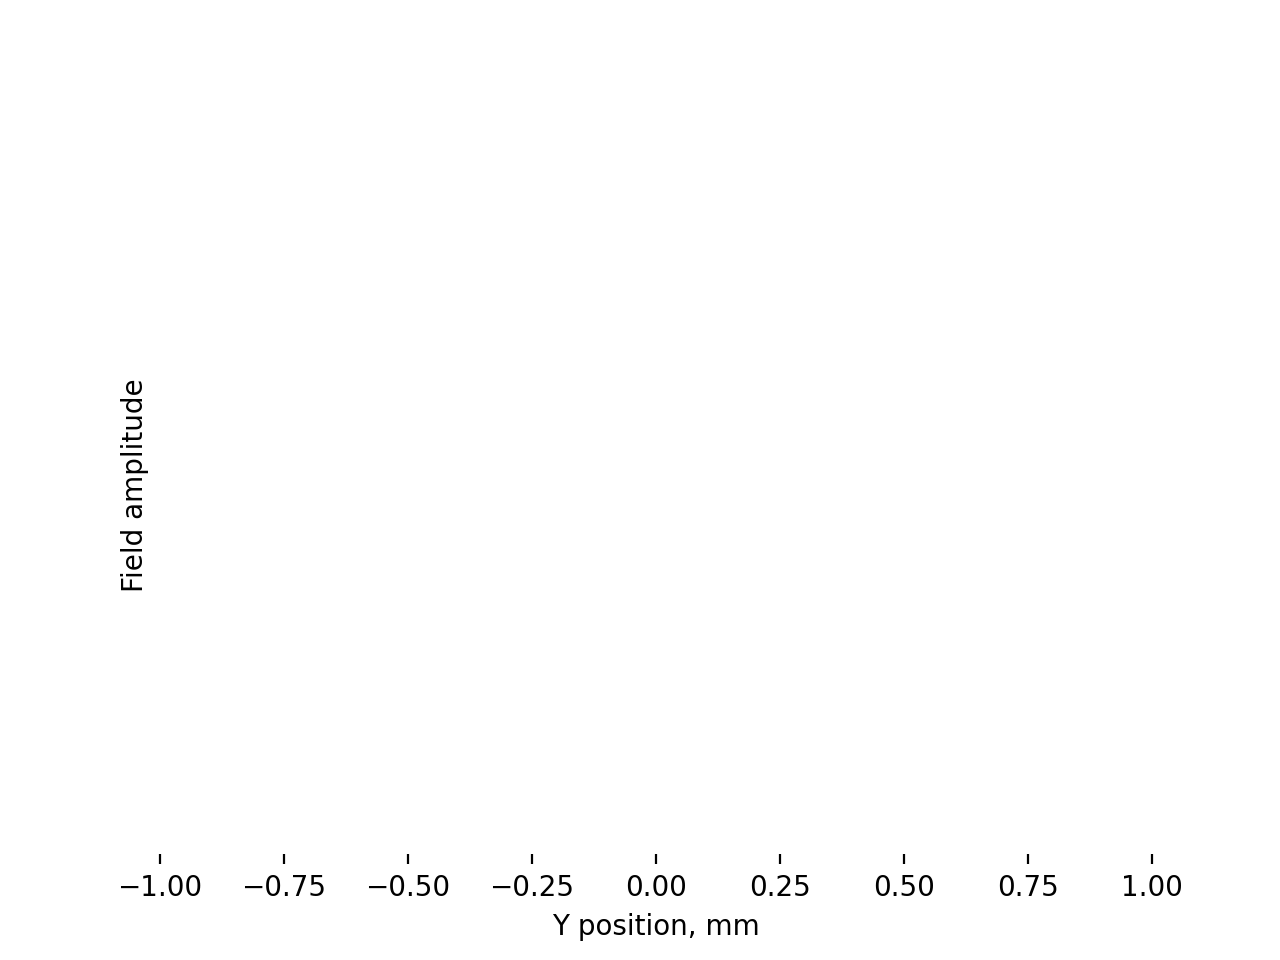

MovieWriter imagemagick unavailable; using Pillow instead.


In [7]:
x = np.linspace(-50, 50, num = 100000)
field = np.zeros(x.size) 
field[np.logical_and(x > -0.60, x <= 0.60)] = 3.848
dy = x[1] - x[0] 
fS = 1 / dy      
f  = fftshift(fftfreq(field.size)*fS*2*np.pi) 
Ek = fftshift(fft(field))*dy
z = 50 
c = 3e11 
wavelength = 6.328e-4
WC2 = ((2*np.pi*(c/wavelength))/(c))**2
Ky2 = f**2
Kz = np.sqrt(WC2 - Ky2)
Ey50 = ifft(ifftshift(Ek*np.exp((-1j)*z*Kz)))*fS
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(0.0,5))
plt.xlabel(r'Y position, mm')
plt.ylabel(r'Field amplitude')
ax.set_yticks([])
ax.set_yticklabels([])
line, = ax.plot([], [], lw=1)
time_text = ax.text(-0.2, 0.2, '',fontsize=12)
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line,time_text
def animate(i):
    x = np.linspace(-50, 50, num = 100000)
    y = ifft(ifftshift(Ek*np.exp((-1j)*i*Kz)))*fS
    line.set_data(x, abs(y))
    time_text.set_text('z (mm) = %.1f' % i)
    return line,time_text
anim = FuncAnimation(fig, animate, init_func=init, frames=150, interval=210, blit=True)
anim.save('Yposition50mm.gif', writer='imagemagick')